In [40]:
## SVM kernels Indepth Intution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [3]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])
print(len(x),len(y))
print(len(x1),len(y1))

200 200
200 200


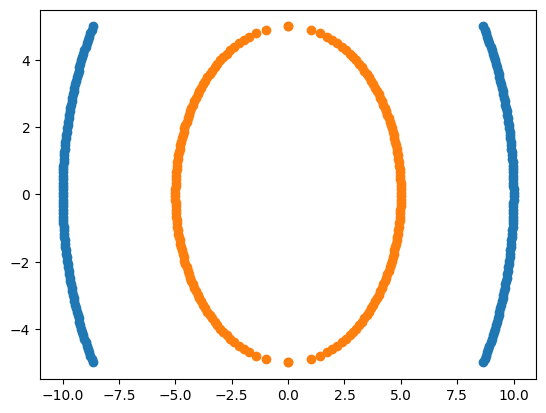

In [4]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [5]:
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['x1','x2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['x1','x2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,x1,x2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [6]:
## indepdent and Dependent Features 
X = df.iloc[:,:2]
Y = df.Y


In [7]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [9]:
Y_train

247    1
110    0
16     0
66     0
153    0
      ..
71     0
106    0
270    1
348    1
102    0
Name: Y, Length: 300, dtype: int64

In [10]:
## we need to find the key elements for polynomial kernel
## X1, X2, X1_square, X2_square, X1*X2
df['X1_square'] = df['x1']**2
df['X2_square'] = df['x2']**2
df['X1*X2'] = (df['x1']*df['x2'])
df.head()

,x1,x2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [11]:
## Depedent and Indendent Features
X_ = df[['x1','x2','X1_square','X2_square','X1*X2']]
Y_ = df['Y']

In [12]:
X__train, X__Test, Y__Train, Y__Test = train_test_split(X_,Y_,test_size=0.25,random_state=42)

In [13]:
pip install -U nbformat


Note: you may need to restart the kernel to use updated packages.


In [15]:
import plotly.express as px
fig = px.scatter_3d(df,x='X1_square',y='X2_square',z='X1*X2',color='Y')
fig.show()

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='linear')
classifier.fit(X__train,Y__Train)
Y_pred = classifier.predict(X__Test)
accuracy_score(Y__Test,Y_pred)

1.0

In [24]:
## Directly apply polynomial kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='poly')
classifier.fit(X__train,Y__Train)
Y_pred = classifier.predict(X__Test)
accuracy_score(Y__Test,Y_pred)

1.0

In [25]:
## Directly apply rbf kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='rbf')
classifier.fit(X__train,Y__Train)
Y_pred = classifier.predict(X__Test)
accuracy_score(Y__Test,Y_pred)

1.0

In [26]:
## Directly apply sigmoid kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='sigmoid')
classifier.fit(X__train,Y__Train)
Y_pred = classifier.predict(X__Test)
accuracy_score(Y__Test,Y_pred)

1.0